## Superstore Sales Dataset Analysis Using PysPark and Forecasting Using FbProphet
#### Table of contents:
<li>Data loadind
<li>Handling Data
<li>Analyze the data
<li>Information Gathering
<li>Visualizing the insights
<li>Insights
<li>Forecasting

In [ ]:
#We Load the data from kaggle Using API
#install Kaggle
!pip install -q Kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sikandaryousfzai","key":"bbb23249e9ef3a6944aa1829f75bdd92"}'}

In [8]:
#create a kaggle folder
! mkdir ~/.kaggle

In [9]:
#copy the kaggle.json file to folder that we created
! cp kaggle.json ~/.kaggle/

In [10]:
#Permisson For the json to act
! chmod 600 ~/.kaggle/kaggle.json


In [11]:
#Downlode the data set
!kaggle datasets download -d rohitsahoo/sales-forecasting

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 64.3MB/s]


In [12]:
#Unzip the data set
!unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [ ]:
# install pySpark

In [13]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 62.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=7eaaa164e0cb970cbc186d6e240acd9f2816b01329d2cef2cd6a6813c7a9112d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


### Import Libraries and Create Pyspark Session

In [14]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
sparkContext=spark.sparkContext

### Read the data Using Pyspark

In [15]:
df_pyspark=spark.read.csv("/content/drive/MyDrive/PySpark/Sale_data.csv",header=True, inferSchema=True)

In [16]:
df_pyspark.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+
|     1|CA-2017-152156|08/11/2017|11/11/2017|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|    42420.0|  South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset Col...|  261.96|
|     2|CA-2017-152156|0

In [17]:
#Show all column
df_pyspark.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: double (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)



### Dealing the Null and Missing Values

In [18]:
### Get count of both null and missing values in pyspark
 
from pyspark.sql.functions import isnan, when, count, col
df_pyspark.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_pyspark.columns]).show()

+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+
|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+
|     0|       0|         0|        0|        0|          0|            0|      0|      0|   0|    0|         11|     0|         0|       0|           0|           0|    0|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+



In [19]:
#Drop Null values
df_pyspark=df_pyspark.na.drop()

In [20]:
### Get count of both null and missing values in pyspark
 
from pyspark.sql.functions import isnan, when, count, col
df_pyspark.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_pyspark.columns]).show()

+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+
|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+
|     0|       0|         0|        0|        0|          0|            0|      0|      0|   0|    0|          0|     0|         0|       0|           0|           0|    0|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+



### Convert The Sells  Column from string to integar 

In [21]:
#Set the data type of colunm
from pyspark.sql.functions import col
df_pyspark=df_pyspark.withColumn("Sales",col("Sales").cast("int"))


### Statistical analysis 

In [22]:
#Describe
df_pyspark.describe().show()

+-------+-----------------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+--------+-------+------------------+-------+---------------+----------+------------+--------------------+------------------+
|summary|           Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|    City|  State|       Postal Code| Region|     Product ID|  Category|Sub-Category|        Product Name|             Sales|
+-------+-----------------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+--------+-------+------------------+-------+---------------+----------+------------+--------------------+------------------+
|  count|             9789|          9789|      9789|      9789|          9789|       9789|              9789|       9789|         9789|    9789|   9789|              9789|   9789|           9789|      9789|        97

### Convert The Order date column from str to Date type

In [23]:
# Order Date
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
# This function converts the string cell into a date:
func =  udf (lambda x: datetime.strptime(x, '%d/%m/%Y'), DateType())

df_pyspark = df_pyspark.withColumn('Order_Date', func(col('Order Date')))


In [24]:
# Ship Date
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
# This function converts the string cell into a date:
func =  udf (lambda x: datetime.strptime(x, '%d/%m/%Y'), DateType())

df_pyspark = df_pyspark.withColumn('Ship_Date', func(col('Ship Date')))

# df_pyspark.show()

# df_pyspark.printSchema()

In [25]:
df_pyspark.select('Order_Date').show()

+----------+
|Order_Date|
+----------+
|2017-11-08|
|2017-11-08|
|2017-06-12|
|2016-10-11|
|2016-10-11|
|2015-06-09|
|2015-06-09|
|2015-06-09|
|2015-06-09|
|2015-06-09|
|2015-06-09|
|2015-06-09|
|2018-04-15|
|2017-12-05|
|2016-11-22|
|2016-11-22|
|2015-11-11|
|2015-05-13|
|2015-08-27|
|2015-08-27|
+----------+
only showing top 20 rows



### Extract Year from Order Date

In [26]:
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date
 
df_pyspark = df_pyspark.withColumn('Order_Year',year(df_pyspark. Order_Date))
df_pyspark = df_pyspark.withColumn('Ship_year',year(df_pyspark. Ship_Date))

df_pyspark.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|Sales|Order_Date| Ship_Date|Order_Year|Ship_year|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|     1|CA-2017-152156|08/11/2017|11/11/2017|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|

### Drop Unwanted Column

In [27]:
#Drop The colunm

df_pyspark=df_pyspark.drop("Order Date","Ship Date")
df_pyspark.show()

+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|Row ID|      Order ID|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|Sales|Order_Date| Ship_Date|Order_Year|Ship_year|
+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|     1|CA-2017-152156|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|    42420.0|  South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset Col...|  

### Data Analysis 

In [28]:
#Total Number of Sales
sum=df_pyspark.agg({'Sales': 'sum'})
sum.show()

+----------+
|sum(Sales)|
+----------+
|   2222587|
+----------+



In [29]:
# Every Year number of Sales
#Groupby
Yearly_sales=df_pyspark.groupby('Order_Year').sum()
Y=Yearly_sales.select('Order_Year','sum(Sales)')
Y.show()


+----------+----------+
|Order_Year|sum(Sales)|
+----------+----------+
|      2018|    711224|
|      2015|    476348|
|      2016|    447087|
|      2017|    587928|
+----------+----------+



In [30]:
Yearly_sales=Y.toPandas()
Yearly_sales

,Order_Year,sum(Sales)
0,2018,711224
1,2015,476348
2,2016,447087
3,2017,587928


### Visulization of Yearly Sales

In [32]:
import plotly.express as px
fig = px.pie(Yearly_sales, values='sum(Sales)', names='Order_Year')
fig.show()

In [33]:
#Orderby
order_date=df_pyspark.orderBy('Order_Date')
order_date.show()

+------+--------------+--------------+-----------+----------------+-----------+-------------+------------+------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|Row ID|      Order ID|     Ship Mode|Customer ID|   Customer Name|    Segment|      Country|        City|       State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|Sales|Order_Date| Ship_Date|Order_Year|Ship_year|
+------+--------------+--------------+-----------+----------------+-----------+-------------+------------+------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|  7981|CA-2015-103800|Standard Class|   DP-13000|   Darren Powers|   Consumer|United States|     Houston|       Texas|    77095.0|Central|OFF-PA-10000174|Office Supplies|       Paper|"Message Book, Wi...| null|2015-01-03|2015-01-07|  

### Sales Trend

In [34]:
trend=order_date.groupby('Order_Date').sum()
# Yearly_sales=df_pyspark.groupby('ship_year').sum()
Tr=trend.select('Order_Date','sum(Sales)')
Tr=Tr.orderBy('Order_Date')
Tr=Tr.na.drop()
Tr.show()
Trend=Tr.toPandas()

+----------+----------+
|Order_Date|sum(Sales)|
+----------+----------+
|2015-01-04|       286|
|2015-01-05|        19|
|2015-01-06|      4401|
|2015-01-07|        86|
|2015-01-09|        40|
|2015-01-10|        53|
|2015-01-11|         9|
|2015-01-13|      3546|
|2015-01-14|        61|
|2015-01-15|       149|
|2015-01-16|       299|
|2015-01-18|        64|
|2015-01-19|       377|
|2015-01-20|      2644|
|2015-01-23|        40|
|2015-01-26|      1056|
|2015-01-27|       426|
|2015-01-30|       239|
|2015-01-31|       290|
|2015-02-01|       468|
+----------+----------+
only showing top 20 rows



In [35]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure([go.Scatter(x=Trend['Order_Date'], y=Trend['sum(Sales)'])])
fig.update_layout(title_text='Sales Trend', title_x=0.5)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Sales")
fig.show()

#Yearly Sales Trend

In [36]:
df_pyspark.show()

+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|Row ID|      Order ID|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|Sales|Order_Date| Ship_Date|Order_Year|Ship_year|
+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+----------+----------+----------+---------+
|     1|CA-2017-152156|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|    42420.0|  South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset Col...|  

In [37]:
Yr=order_date.groupby('Order_Year').sum() 
Yr=Yr.select('Order_Year','sum(Sales)')

In [38]:
Yearly_Trend=Yr.toPandas()
Yearly_Trend=Yearly_Trend.sort_values(by='Order_Year')
Yearly_Trend.head()


,Order_Year,sum(Sales)
1,2015,476348
2,2016,447087
3,2017,587928
0,2018,711224


In [39]:
import plotly.graph_objects as go

import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
fig = go.Figure([go.Scatter(x=Yearly_Trend['Order_Year'], y=Yearly_Trend['sum(Sales)'])])
fig.update_layout(title_text='Yearly Sales Trend', title_x=0.5)
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Sales")
fig.show()

### Most Number of Sub category That are Sold

In [40]:
#Most Number of Sub category That are Sold
sub_categ_sales=df_pyspark.groupby('Sub-Category')
# Yearly_sales.select('ship_year','sum(Sales)').show()
Sub_Ca=sub_categ_sales.count()
Sub_Ca.show()

+------------+-----+
|Sub-Category|count|
+------------+-----+
|   Envelopes|  247|
|         Art|  784|
|      Chairs|  606|
| Furnishings|  931|
|    Supplies|  184|
|   Fasteners|  214|
|     Binders| 1492|
|   Bookcases|  225|
|      Labels|  357|
|       Paper| 1336|
| Accessories|  754|
|     Copiers|   66|
|      Phones|  875|
|    Machines|  115|
|     Storage|  831|
|  Appliances|  458|
|      Tables|  314|
+------------+-----+



In [41]:
df=Sub_Ca.toPandas()

In [42]:
df.head()

,Sub-Category,count
0,Envelopes,247
1,Art,784
2,Chairs,606
3,Furnishings,931
4,Supplies,184


### Visulization of Sub-Category

In [43]:

fig = px.bar(df, x='Sub-Category', y='count', text_auto=True,title='Sub-Category Sale Count')
fig.show()

### In which City the Most Number of Sells are:

In [44]:
#Groupby
City =df_pyspark.groupby('City').sum()
Y=City.select('City','sum(Sales)')
Y.orderBy('sum(Sales)',ascending=False).show()

+-------------+----------+
|         City|sum(Sales)|
+-------------+----------+
|New York City|    250804|
|  Los Angeles|    170319|
|      Seattle|    114089|
|San Francisco|    107014|
| Philadelphia|    106976|
|      Houston|     63641|
|    San Diego|     47016|
|      Chicago|     46888|
| Jacksonville|     44532|
|      Detroit|     42228|
|  Springfield|     41475|
|     Columbus|     37373|
|       Newark|     28233|
|    Lafayette|     24893|
|      Jackson|     24854|
|     Columbia|     24734|
|  San Antonio|     21809|
|    Arlington|     20168|
|       Dallas|     19672|
|     Lakewood|     18152|
+-------------+----------+
only showing top 20 rows



In [45]:
df=Y.toPandas()

fig = px.bar(df, x='City', y='sum(Sales)', text_auto=True,title='Sub-Category Sale Count')
fig.show()

In [46]:
#Pivot Table
pivotDF = df_pyspark.groupBy("City").pivot("Sub-Category").sum("Sales")
pivotDF.show(truncate=False)

+---------------+-----------+----------+----+-------+---------+------+-------+---------+---------+-----------+------+--------+-----+------+-------+--------+------+
|City           |Accessories|Appliances|Art |Binders|Bookcases|Chairs|Copiers|Envelopes|Fasteners|Furnishings|Labels|Machines|Paper|Phones|Storage|Supplies|Tables|
+---------------+-----------+----------+----+-------+---------+------+-------+---------+---------+-----------+------+--------+-----+------+-------+--------+------+
|Tyler          |27         |2         |null|233    |null     |null  |null   |null     |null     |82         |null  |null    |null |null  |null   |null    |null  |
|Tempe          |69         |null      |null|3      |null     |307   |null   |12       |12       |null       |null  |null    |null |548   |89     |15      |null  |
|Springfield    |3665       |2510      |707 |542    |800      |2290  |5498   |570      |30       |1595       |439   |681     |1012 |6358  |3559   |4203    |7016  |
|Pasco          

### Forecasting Using FbProphet

In [47]:
#Convert From Pyspark DataFrame to Pandas DataFrame
df=df_pyspark.toPandas()

In [50]:
# Google Colab 
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 109 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638579 sha256=5a6ef15632fafe98d9a871a4dd24e0a6347c74cd6724b62b635ebf01c927e403
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the 

In [51]:
import fbprophet

In [52]:
Trend.columns = ['ds','y']
Trend.head()

,ds,y
0,2015-01-04,286
1,2015-01-05,19
2,2015-01-06,4401
3,2015-01-07,86
4,2015-01-09,40


In [53]:
Trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1224 non-null   object
 1   y       1224 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.2+ KB


In [54]:
df=Trend
df['ds'] = pd.to_datetime(df['ds'])

In [55]:
df.head()

,ds,y
0,2015-01-04,286
1,2015-01-05,19
2,2015-01-06,4401
3,2015-01-07,86
4,2015-01-09,40


In [56]:
# Using plotly.express
import plotly.express as px

# df = px.data.stocks()
fig = px.line(df, x='ds', y="y")
fig.show()

# import the fbprophet library

In [57]:
from fbprophet import Prophet

In [58]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

### Initialize the Model

In [59]:
model=Prophet()

In [60]:
df.columns

Index(['ds', 'y'], dtype='object')

### Train Model

In [61]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [63]:
df.tail()

,ds,y
1219,2018-12-26,769
1220,2018-12-27,177
1221,2018-12-28,1646
1222,2018-12-29,2909
1223,2018-12-30,710


In [64]:
### Forecast Away for 365 days

In [76]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [77]:
future_dates.tail()

,ds
1584,2019-12-26
1585,2019-12-27
1586,2019-12-28
1587,2019-12-29
1588,2019-12-30


In [78]:
# Predication of Next 365 days

In [79]:
prediction=model.predict(future_dates)

In [80]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1416.890114,-1441.984309,3891.913190,1416.890114,1416.890114,-205.872848,-205.872848,-205.872848,127.832040,127.832040,127.832040,-333.704888,-333.704888,-333.704888,0.0,0.0,0.0,1211.017265
1,2015-01-05,1417.084757,-1973.078121,3648.655902,1417.084757,1417.084757,-414.790203,-414.790203,-414.790203,9.210862,9.210862,9.210862,-424.001065,-424.001065,-424.001065,0.0,0.0,0.0,1002.294554
2,2015-01-06,1417.279401,-1642.562037,4066.821311,1417.279401,1417.279401,-165.501361,-165.501361,-165.501361,342.157883,342.157883,342.157883,-507.659243,-507.659243,-507.659243,0.0,0.0,0.0,1251.778040
3,2015-01-07,1417.474044,-2031.326976,3332.539859,1417.474044,1417.474044,-677.985240,-677.985240,-677.985240,-94.398875,-94.398875,-94.398875,-583.586365,-583.586365,-583.586365,0.0,0.0,0.0,739.488805
4,2015-01-09,1417.863332,-1873.160275,3407.042156,1417.863332,1417.863332,-773.160295,-773.160295,-773.160295,-64.493564,-64.493564,-64.493564,-708.666731,-708.666731,-708.666731,0.0,0.0,0.0,644.703037


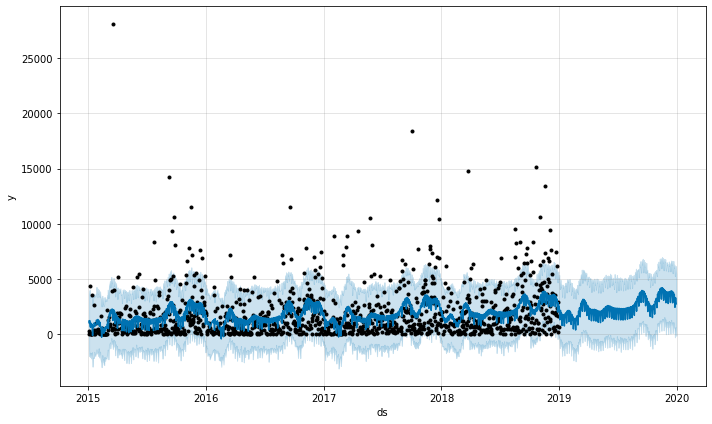

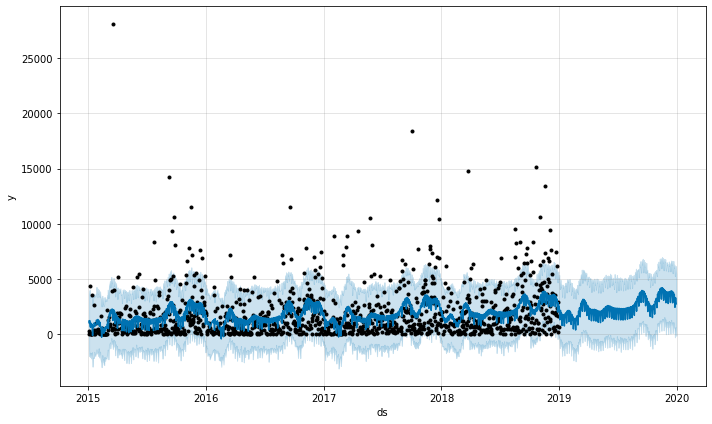

In [81]:
### plot the predicted projection
model.plot(prediction)

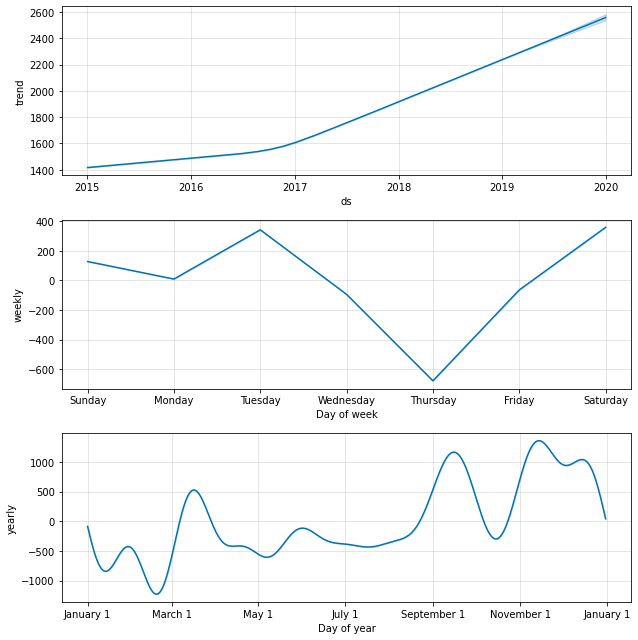

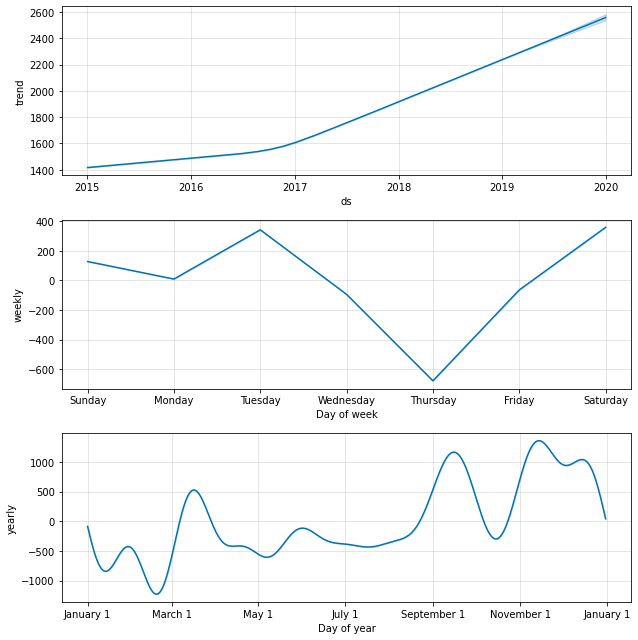

In [82]:
#### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

### Cross validation

In [1]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [70]:
!pip install adhan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adhan: filename=adhan-0.1.1-py3-none-any.whl size=7318 sha256=7c310099d5afee4d132ebebee4428272b1d112cec173e6a4a117be675e10d459
  Stored in directory: /root/.cache/pip/wheels/21/48/04/887b1518e37738bf2fafe11702b7d6e1992ce8b7f3231005c4
Successfully built adhan


In [74]:
from datetime import date

from adhan import adhan
from adhan.methods import KARACHI, ASR_STANDARD

params = {}
params.update(KARACHI)
params.update(ASR_STANDARD)

adhan_times = adhan(
    day=date.today(),
    location=(34.0151,71.5249),
    parameters=params,
    timezone_offset=-6,
)

In [75]:
adhan_times

{'fajr': datetime.datetime(2022, 8, 18, 2, 39),
 'zuhr': datetime.datetime(2022, 8, 18, 10, 51),
 'shuruq': datetime.datetime(2022, 8, 18, 4, 10),
 'asr': datetime.datetime(2022, 8, 18, 14, 32),
 'maghrib': datetime.datetime(2022, 8, 18, 17, 32),
 'isha': datetime.datetime(2022, 8, 18, 19, 2)}